In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn

In [110]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
device

'cpu'

## 1. Chargement des données



In [79]:
data = pd.read_csv('IAM.PA.csv')
data

Date   Open   High    Low  Close  Adj Close   Volume
0     2010-01-04  12.17  12.20  12.03  12.18   0.000022  18752.0
1     2010-01-05  12.20  12.21  11.92  12.02   0.000021  64444.0
2     2010-01-06  12.00  12.11  11.99  12.11   0.000022  18222.0
3     2010-01-07  12.01  12.49  12.01  12.24   0.000022  78102.0
4     2010-01-08  12.21  12.45  12.11  12.42   0.000022   9351.0
...          ...    ...    ...    ...    ...        ...      ...
3578  2023-12-21   8.50   8.50   8.50   8.50   8.500000      1.0
3579  2023-12-22   8.50   8.50   8.50   8.50   8.500000     51.0
3580  2023-12-27   8.50   8.50   8.50   8.50   8.500000     70.0
3581  2023-12-28   8.50   8.50   8.50   8.50   8.500000     25.0
3582  2023-12-29   8.50   8.50   8.30   8.50   8.500000    371.0

[3583 rows x 7 columns]

- Open = le prix d'ouverture, c'est-à-dire le cours auquel l'action a été cotée au début d'une séance de négociation. C'est le premier prix auquel les transactions ont eu lieu pendant la journée de trading.
- High = le prix le plus élevé, représente le point culminant atteint par le cours de l'action au cours de la séance de négociation.
- Low = le prix le plus bas atteint par le cours de l'action.
- Close = le prix de clôture, c'est le cours auquel une action a été cotée à la fin de la séance de négociation.
- Adj close = le prix de clôture ajusté, c'est le prix de clôture modifié pour tenir compte des ajustements tels que les dividendes, les émissions d'actions,etc.
- Volume = la quantité totale d'actions échangées pendant la séance de négociation. Il indique l'activité et la liquidité du marché.Un volume élevé peut indiquer un intérêt accru des investisseurs, tandis qu'un volume faible peut indiquer un manque d'intérêt ou de participation au marché.



## 2. Découverte des données

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3583 entries, 0 to 3582
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3583 non-null   object 
 1   Open       3581 non-null   float64
 2   High       3581 non-null   float64
 3   Low        3581 non-null   float64
 4   Close      3581 non-null   float64
 5   Adj Close  3581 non-null   float64
 6   Volume     3581 non-null   float64
dtypes: float64(6), object(1)
memory usage: 196.1+ KB


In [81]:
data.describe()

Open         High          Low        Close    Adj Close  \
count  3581.000000  3581.000000  3581.000000  3581.000000  3581.000000   
mean     11.727970    11.806306    11.597085    11.708917     1.701814   
std       1.788546     1.800096     1.768182     1.787454     2.594718   
min       7.100000     7.250000     7.100000     7.200000     0.000021   
25%      10.180000    10.250000    10.000000    10.130000     0.005264   
50%      12.400000    12.490000    12.300000    12.370000     0.130412   
75%      13.120000    13.200000    13.000000    13.100000     2.463710   
max      14.800000    14.800000    14.550000    14.700000     9.800000   

              Volume  
count    3581.000000  
mean     4560.709020  
std     12920.024706  
min         0.000000  
25%       447.000000  
50%      1379.000000  
75%      4239.000000  
max    471297.000000

In [82]:
data.isnull().sum()


Date         0
Open         2
High         2
Low          2
Close        2
Adj Close    2
Volume       2
dtype: int64

## 3. Prétraitement


In [83]:
data['Date'] = pd.to_datetime(data['Date'])
data['Date']

0      2010-01-04
1      2010-01-05
2      2010-01-06
3      2010-01-07
4      2010-01-08
          ...    
3578   2023-12-21
3579   2023-12-22
3580   2023-12-27
3581   2023-12-28
3582   2023-12-29
Name: Date, Length: 3583, dtype: datetime64[ns]

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3583 entries, 0 to 3582
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3583 non-null   datetime64[ns]
 1   Open       3581 non-null   float64       
 2   High       3581 non-null   float64       
 3   Low        3581 non-null   float64       
 4   Close      3581 non-null   float64       
 5   Adj Close  3581 non-null   float64       
 6   Volume     3581 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 196.1 KB


In [85]:
data = data.dropna()
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3581 entries, 0 to 3582
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3581 non-null   datetime64[ns]
 1   Open       3581 non-null   float64       
 2   High       3581 non-null   float64       
 3   Low        3581 non-null   float64       
 4   Close      3581 non-null   float64       
 5   Adj Close  3581 non-null   float64       
 6   Volume     3581 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 223.8 KB


In [86]:
data['Year'] = data['Date'].dt.year
year_counts = data['Year'].value_counts().sort_index()
print(year_counts)


2010    256
2011    257
2012    254
2013    255
2014    256
2015    255
2016    257
2017    255
2018    255
2019    256
2020    257
2021    258
2022    257
2023    253
Name: Year, dtype: int64


<ipython-input-86-0de4ae5dae87>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Year'] = data['Date'].dt.year


Ce qui est logique comme on exclut les jours ouvrés

## 4. Visualisation des données

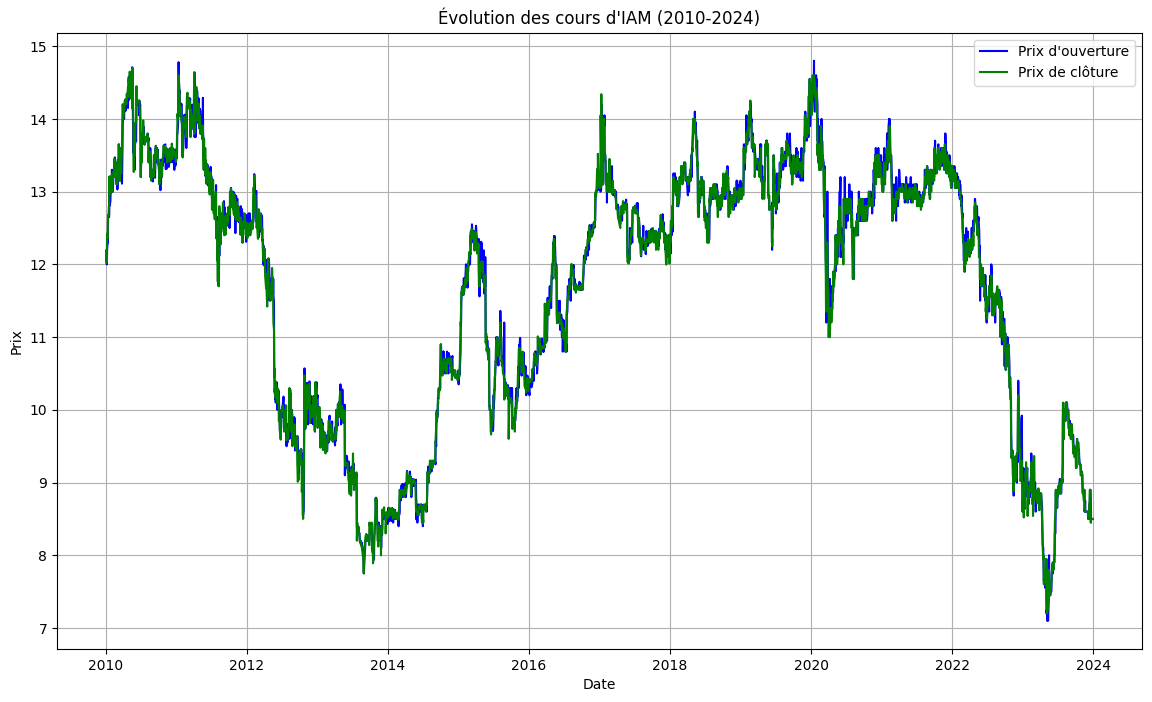

In [87]:
plt.figure(figsize=(14, 8))
plt.plot(data['Date'], data['Open'], label='Prix d\'ouverture', color='blue')
plt.plot(data['Date'], data['Close'], label='Prix de clôture', color='green')

plt.title('Évolution des cours d\'IAM (2010-2024)')
plt.xlabel('Date')
plt.ylabel('Prix')
plt.legend()
plt.grid(True)
plt.show()

Pendant la période de 2012 à 2014, les cours de l'action d'IAM ont connu une baisse significative, due à un contexte morose sur le marché boursier de Casablanca. La perte de confiance des investisseurs, des résultats décevants de grandes entreprises telles que Maroc Telecom, une distribution de dividendes en baisse, et des problèmes de liquidité ont contribué à cette tendance baissière. Ces facteurs ont persisté, laissant entrevoir une poursuite de la baisse au moins jusqu'à la publication des résultats du premier semestre en septembre de cette année-là.

On remarque également une baisse accentuée pendant la période de 2022 et ce après l'annonce du Conseil Bank-Al-Maghrib qui a décidé de faire passer le taux directeur de 1,5% à 2%, d'autre part, Ittissalat AlMaghrib devrait régler un montant de 2,4 MMDH au Trésor suite à la décision de l'ANRT

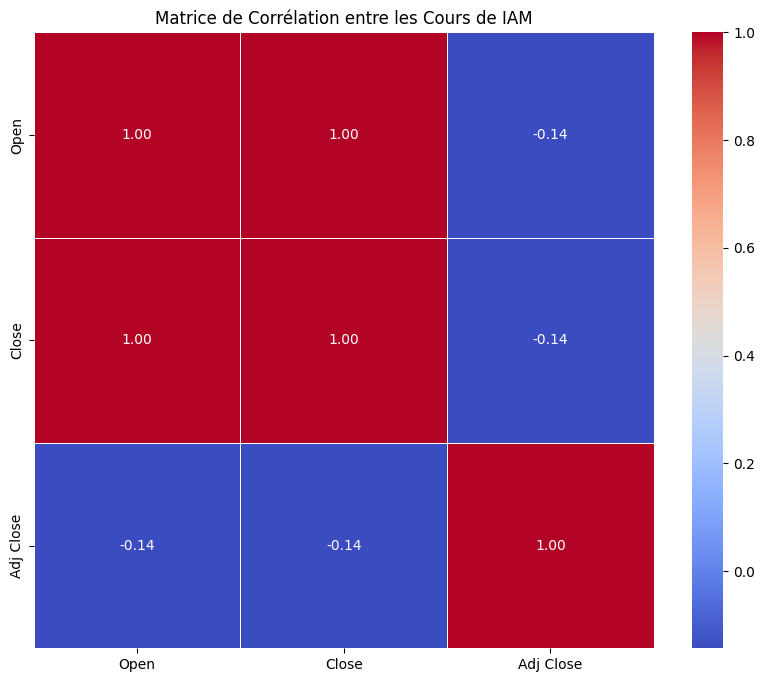

In [88]:
numerical_columns = ['Open', 'Close', 'Adj Close']
correlation_data = data[numerical_columns]
correlation_matrix = correlation_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matrice de Corrélation entre les Cours de IAM')
plt.show()

**Corrélation entre 'Open' et 'Adj Close'** : La corrélation est -0.14, indiquant une faible corrélation négative entre les prix d'ouverture ('Open') et les prix ajustés en clôture ('Adj Close'). Cette faible corrélation suggère que les variations dans le prix d'ouverture ne sont pas fortement associées aux variations dans les prix ajustés en clôture.

**Corrélation entre 'Open' et 'Close'** : La corrélation est 1, indiquant une forte corrélation positive entre les prix d'ouverture ('Open') et les prix de clôture ( Close'). Cette faible corrélation suggère que les variations dans le prix d'ouverture ne sont pas fortement associées aux variations dans les prix ajustés en clôture.

## 5. Préparation des données pour LSTM

On prépare nos données au modèle en transformant le DataFrame de séries temporelles en un format adapté à l'entraînement de modèles LSTM (Long Short-Term Memory) en vue de la prédiction de valeurs futures du prix d'ouverture


In [92]:
df = data[['Date','Open']]
df

Date   Open
0    2010-01-04  12.17
1    2010-01-05  12.20
2    2010-01-06  12.00
3    2010-01-07  12.01
4    2010-01-08  12.21
...         ...    ...
3578 2023-12-21   8.50
3579 2023-12-22   8.50
3580 2023-12-27   8.50
3581 2023-12-28   8.50
3582 2023-12-29   8.50

[3581 rows x 2 columns]

In [96]:
from copy import deepcopy as dc

def prepare_dataframe_for_lstm(df, n_steps):
    df = dc(df)

    df.set_index('Date', inplace=True)

    open_columns = []
    for i in range(1, n_steps+1):
        col_name = f'Open(t-{i})'
        open_columns.append(col_name)
        df[col_name] = df['Open'].shift(i)

    df = df[['Open'] + open_columns].dropna()

    return df

lookback = 20
shifted_df = prepare_dataframe_for_lstm(data, lookback)
shifted_df[['Open'] + [f'Open(t-{i})' for i in range(1, lookback+1)]]


Open  Open(t-1)  Open(t-2)  Open(t-3)  Open(t-4)  Open(t-5)  \
Date                                                                       
2010-02-01  13.00      12.99      12.99      13.00      12.98      12.87   
2010-02-02  13.30      13.00      12.99      12.99      13.00      12.98   
2010-02-03  13.18      13.30      13.00      12.99      12.99      13.00   
2010-02-04  13.25      13.18      13.30      13.00      12.99      12.99   
2010-02-05  13.00      13.25      13.18      13.30      13.00      12.99   
...           ...        ...        ...        ...        ...        ...   
2023-12-21   8.50       8.45       8.80       8.90       8.90       8.75   
2023-12-22   8.50       8.50       8.45       8.80       8.90       8.90   
2023-12-27   8.50       8.50       8.50       8.45       8.80       8.90   
2023-12-28   8.50       8.50       8.50       8.50       8.45       8.80   
2023-12-29   8.50       8.50       8.50       8.50       8.50       8.45   

            Open(t-6)  Open(t-7)  Open(t-8)  Open(t-9)  ...  Open(t-11)  \
Date                                                    ...               
2010-02-01      12.81      13.15      13.08      12.68  ...       12.68   
2010-02-02      12.87      12.81      13.15      13.08  ...       12.65   
2010-02-03      12.98      12.87      12.81      13.15  ...       12.68   
2010-02-04      13.00      12.98      12.87      12.81  ...       13.08   
2010-02-05      12.99      13.00      12.98      12.87  ...       13.15   
...               ...        ...        ...        ...  ...         ...   
2023-12-21       8.70       8.55       8.50       8.55  ...        8.55   
2023-12-22       8.75       8.70       8.55       8.50  ...        8.55   
2023-12-27       8.90       8.75       8.70       8.55  ...        8.55   
2023-12-28       8.90       8.90       8.75       8.70  ...        8.50   
2023-12-29       8.80       8.90       8.90       8.75  ...        8.55   

            Open(t-12)  Open(t-13)  Open(t-14)  Open(t-15)  Open(t-16)  \
Date                                                                     
2010-02-01       12.65       12.68       12.30       12.31       12.21   
2010-02-02       12.68       12.65       12.68       12.30       12.31   
2010-02-03       12.65       12.68       12.65       12.68       12.30   
2010-02-04       12.68       12.65       12.68       12.65       12.68   
2010-02-05       13.08       12.68       12.65       12.68       12.65   
...                ...         ...         ...         ...         ...   
2023-12-21        8.50        8.60        8.60        8.60        8.60   
2023-12-22        8.55        8.50        8.60        8.60        8.60   
2023-12-27        8.55        8.55        8.50        8.60        8.60   
2023-12-28        8.55        8.55        8.55        8.50        8.60   
2023-12-29        8.50        8.55        8.55        8.55        8.50   

            Open(t-17)  Open(t-18)  Open(t-19)  Open(t-20)  
Date                                                        
2010-02-01       12.01       12.00       12.20       12.17  
2010-02-02       12.21       12.01       12.00       12.20  
2010-02-03       12.31       12.21       12.01       12.00  
2010-02-04       12.30       12.31       12.21       12.01  
2010-02-05       12.68       12.30       12.31       12.21  
...                ...         ...         ...         ...  
2023-12-21        8.60        8.60        8.60        8.60  
2023-12-22        8.60        8.60        8.60        8.60  
2023-12-27        8.60        8.60        8.60        8.60  
2023-12-28        8.60        8.60        8.60        8.60  
2023-12-29        8.60        8.60        8.60        8.60  

[3561 rows x 21 columns]

On convertit le DataFrame shifted_df en un tableau NumPy. Cette opération est utile vu qu'on travaille avec la bibliothèque PyTorch qui préfère souvent les données au format NumPy.

In [97]:
shifted_df_as_np = shifted_df.to_numpy()
shifted_df_as_np

array([[13.  , 12.99, 12.99, ..., 12.  , 12.2 , 12.17],
       [13.3 , 13.  , 12.99, ..., 12.01, 12.  , 12.2 ],
       [13.18, 13.3 , 13.  , ..., 12.21, 12.01, 12.  ],
       ...,
       [ 8.5 ,  8.5 ,  8.5 , ...,  8.6 ,  8.6 ,  8.6 ],
       [ 8.5 ,  8.5 ,  8.5 , ...,  8.6 ,  8.6 ,  8.6 ],
       [ 8.5 ,  8.5 ,  8.5 , ...,  8.6 ,  8.6 ,  8.6 ]])

In [98]:
shifted_df_as_np.shape

(3561, 21)

### Normalisation des valeurs

In [99]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
shifted_df_as_np = scaler.fit_transform(shifted_df_as_np)

shifted_df_as_np

array([[ 0.53246753,  0.52987013,  0.52987013, ...,  0.27272727,
         0.32467532,  0.31688312],
       [ 0.61038961,  0.53246753,  0.52987013, ...,  0.27532468,
         0.27272727,  0.32467532],
       [ 0.57922078,  0.61038961,  0.53246753, ...,  0.32727273,
         0.27532468,  0.27272727],
       ...,
       [-0.63636364, -0.63636364, -0.63636364, ..., -0.61038961,
        -0.61038961, -0.61038961],
       [-0.63636364, -0.63636364, -0.63636364, ..., -0.61038961,
        -0.61038961, -0.61038961],
       [-0.63636364, -0.63636364, -0.63636364, ..., -0.61038961,
        -0.61038961, -0.61038961]])

In [100]:
X = shifted_df_as_np[:, 1:]
y = shifted_df_as_np[:, 0]

X.shape, y.shape

((3561, 20), (3561,))

 On modifie l'ordre des colonnes dans le tableau X, inversant l'ordre des colonnes décalées comme l'ordre des séquences est important

In [101]:
X = dc(np.flip(X, axis=1))
X

array([[ 0.31688312,  0.32467532,  0.27272727, ...,  0.53246753,
         0.52987013,  0.52987013],
       [ 0.32467532,  0.27272727,  0.27532468, ...,  0.52987013,
         0.52987013,  0.53246753],
       [ 0.27272727,  0.27532468,  0.32727273, ...,  0.52987013,
         0.53246753,  0.61038961],
       ...,
       [-0.61038961, -0.61038961, -0.61038961, ..., -0.64935065,
        -0.63636364, -0.63636364],
       [-0.61038961, -0.61038961, -0.61038961, ..., -0.63636364,
        -0.63636364, -0.63636364],
       [-0.61038961, -0.61038961, -0.61038961, ..., -0.63636364,
        -0.63636364, -0.63636364]])

## 6. Split des données

On définit l'indice du split

In [102]:
split_index = int(len(X) * 0.95)

split_index

3382

In [103]:
X_train = X[:split_index]
X_test = X[split_index:]

y_train = y[:split_index]
y_test = y[split_index:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3382, 20), (179, 20), (3382,), (179,))

On effectue un remodlage à nos ensembles de train et de test pour adapter les dimensions aux exigences du LSTM où les entrées sont tridimensionnelles (nombre d'exemples, taille de la séquence, nombre de caractéristiques).

In [104]:
X_train = X_train.reshape((-1, lookback, 1))
X_test = X_test.reshape((-1, lookback, 1))

y_train = y_train.reshape((-1, 1))
y_test = y_test.reshape((-1, 1))

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3382, 20, 1), (179, 20, 1), (3382, 1), (179, 1))

## 7. Adaptation à PyTorch

On convertit les données d'entraînement et de test de NumPy en tenseurs PyTorch avec le type de données float.

In [105]:
X_train = torch.tensor(X_train).float()
y_train = torch.tensor(y_train).float()
X_test = torch.tensor(X_test).float()
y_test = torch.tensor(y_test).float()

X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([3382, 20, 1]),
 torch.Size([179, 20, 1]),
 torch.Size([3382, 1]),
 torch.Size([179, 1]))

On définit une classe pour encapsuler les données ce qui facilite également l'utilisation des fonctionnalités de chargement de données de PyTorch lors de l'entraînement de modèles.

In [106]:
from torch.utils.data import Dataset

class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, i):
        return self.X[i], self.y[i]

train_dataset = TimeSeriesDataset(X_train, y_train)
test_dataset = TimeSeriesDataset(X_test, y_test)

In [107]:
train_dataset

On utilise des Loaders de PyTorch qui fournissent une interface pratique pour itérer sur les données en mini-lots pendant l'entraînement du modèle.

In [108]:
from torch.utils.data import DataLoader

batch_size = 16

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [111]:
for _, batch in enumerate(train_loader):
    x_batch, y_batch = batch[0].to(device), batch[1].to(device)
    print(x_batch.shape, y_batch.shape)
    break

torch.Size([16, 20, 1]) torch.Size([16, 1])


## 8. Modèle LSTM

In [112]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_stacked_layers):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_stacked_layers = num_stacked_layers

        self.lstm = nn.LSTM(input_size, hidden_size, num_stacked_layers,
                            batch_first=True)

        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        batch_size = x.size(0)
        h0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)
        c0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)

        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

model = LSTM(1, 4, 1)
model.to(device)
model

LSTM(
  (lstm): LSTM(1, 4, batch_first=True)
  (fc): Linear(in_features=4, out_features=1, bias=True)
)

On définit la fonction `train_one_epoch` qui effectue une seule époque d'entraînement pour un modèle LSTM en itérant sur les mini-lots du chargeur d'entraînement, calculant la perte et mettant à jour les poids du modèle à l'aide de la rétropropagation du gradient. Elle affiche également la perte moyenne pour chaque lot de 100 mini-lots.

In [113]:
def train_one_epoch():
    model.train(True)
    print(f'Epoch: {epoch + 1}')
    running_loss = 0.0
    for batch_index, batch in enumerate(train_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)

        output = model(x_batch)
        loss = loss_function(output, y_batch)
        running_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch_index % 100 == 99:  # print every 100 batches
            avg_loss_across_batches = running_loss / 100
            print('Batch {0}, Loss: {1:.3f}'.format(batch_index+1,
                                                    avg_loss_across_batches))
            running_loss = 0.0
    print()

On définit la fonction `validate_one_epoch`qui effectue une évaluation sur l'ensemble de test pour un modèle LSTM. Elle désactive le mode d'entraînement (`model.train(False)`) pour s'assurer que la normalisation et les couches dropout fonctionnent en mode d'évaluation. La fonction itère ensuite sur les mini-lots du chargeur de test, calcule la perte moyenne, et affiche le résultat. Elle est conçue pour être utilisée après chaque époque d'entraînement pour évaluer la performance du modèle sur les données de test.

In [114]:
def validate_one_epoch():
    model.train(False)
    running_loss = 0.0

    for batch_index, batch in enumerate(test_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)

        with torch.no_grad():
            output = model(x_batch)
            loss = loss_function(output, y_batch)
            running_loss += loss.item()

    avg_loss_across_batches = running_loss / len(test_loader)

    print('Val Loss: {0:.3f}'.format(avg_loss_across_batches))
    print('***************************************************')
    print()

## 9. Optimisation de LSTM

Le modèle LSTM est entraîné sur 20 époques en utilisant la fonction de perte Mean Squared Error (MSE), l'optimiseur Adam avec un taux d'apprentissage de 0.001, et les résultats de l'entraînement et de la validation sont affichés après chaque époque.

In [115]:
learning_rate = 0.001
num_epochs = 20
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    train_one_epoch()
    validate_one_epoch()

Epoch: 1
Batch 100, Loss: 0.143
Batch 200, Loss: 0.042

Val Loss: 0.082
***************************************************

Epoch: 2
Batch 100, Loss: 0.009
Batch 200, Loss: 0.006

Val Loss: 0.029
***************************************************

Epoch: 3
Batch 100, Loss: 0.004
Batch 200, Loss: 0.004

Val Loss: 0.016
***************************************************

Epoch: 4
Batch 100, Loss: 0.004
Batch 200, Loss: 0.003

Val Loss: 0.012
***************************************************

Epoch: 5
Batch 100, Loss: 0.003
Batch 200, Loss: 0.003

Val Loss: 0.010
***************************************************

Epoch: 6
Batch 100, Loss: 0.003
Batch 200, Loss: 0.003

Val Loss: 0.008
***************************************************

Epoch: 7
Batch 100, Loss: 0.003
Batch 200, Loss: 0.003

Val Loss: 0.007
***************************************************

Epoch: 8
Batch 100, Loss: 0.002
Batch 200, Loss: 0.003

Val Loss: 0.006
***************************************************



## 10. Visualisation des prédictions sur l'ensemble de Train

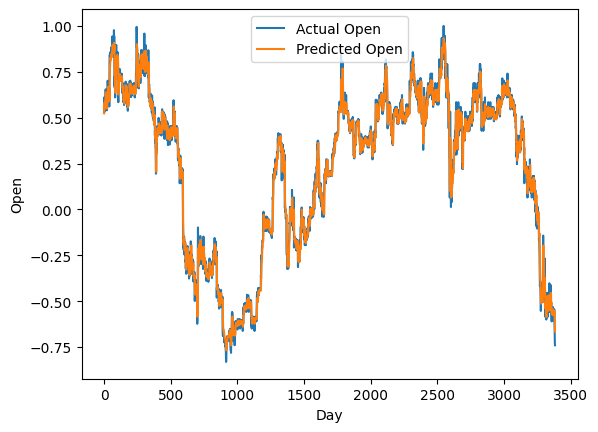

In [116]:
with torch.no_grad():
    predicted = model(X_train.to(device)).to('cpu').numpy()

plt.plot(y_train, label='Actual Open')
plt.plot(predicted, label='Predicted Open')
plt.xlabel('Day')
plt.ylabel('Open')
plt.legend()
plt.show()


Les prédictions du modèle sur l'ensemble d'entraînement, qui ont été transformées à l'aide d'une échelle MinMax, sont inversées pour obtenir les valeurs d'ouverture prédites originales

In [117]:
train_predictions = predicted.flatten()

dummies = np.zeros((X_train.shape[0], lookback+1))
dummies[:, 0] = train_predictions
dummies = scaler.inverse_transform(dummies)

train_predictions = dc(dummies[:, 0])
train_predictions

array([12.96572729, 12.97288402, 13.14057842, ...,  8.60256312,
        8.49840402,  8.38851005])

In [118]:
dummies = np.zeros((X_train.shape[0], lookback+1))
dummies[:, 0] = y_train.flatten()
dummies = scaler.inverse_transform(dummies)

new_y_train = dc(dummies[:, 0])
new_y_train

array([13.00000004, 13.29999992, 13.17999997, ...,  8.29999997,
        8.14999992,  8.0999999 ])

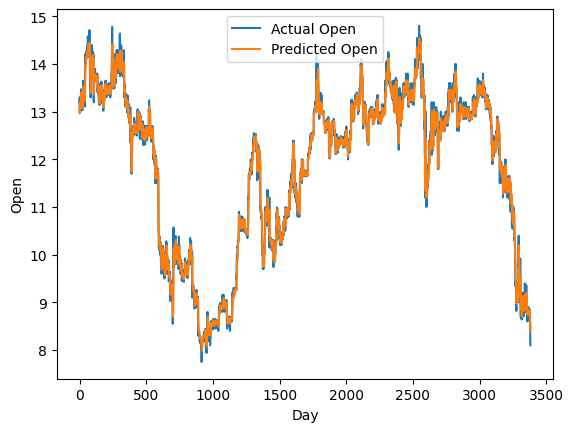

In [119]:
plt.plot(new_y_train, label='Actual Open')
plt.plot(train_predictions, label='Predicted Open')
plt.xlabel('Day')
plt.ylabel('Open')
plt.legend()
plt.show()


## 11. Prédictions sur l'ensemble de Test

In [120]:
test_predictions = model(X_test.to(device)).detach().cpu().numpy().flatten()

dummies = np.zeros((X_test.shape[0], lookback+1))
dummies[:, 0] = test_predictions
dummies = scaler.inverse_transform(dummies)

test_predictions = dc(dummies[:, 0])
test_predictions

array([ 8.30950196,  8.21425671,  8.12846135,  8.0206811 ,  7.97179152,
        7.95341264,  7.95294565,  7.92251551,  7.87843969,  7.84047717,
        7.85642726,  7.93233349,  7.77915333,  7.71310593,  7.64245519,
        7.64125021,  7.64697774,  7.626031  ,  7.58311566,  7.61039828,
        7.73071468,  7.85515755,  7.82030354,  7.80992609,  7.76994094,
        7.74894211,  7.73621504,  7.73957689,  7.74015884,  7.73998123,
        7.77683125,  7.8234008 ,  7.87803971,  7.88312884,  7.93133618,
        7.93129051,  7.93383106,  7.9506752 ,  7.9749099 ,  7.98894362,
        8.02761385,  8.04988239,  8.16022706,  8.2227327 ,  8.36922427,
        8.55208257,  8.67714297,  8.70905325,  8.71317467,  8.74127309,
        8.69721265,  8.7376572 ,  8.75835795,  8.79047016,  8.85045499,
        8.88217916,  8.8573648 ,  8.88979852,  8.90672779,  8.93791704,
        8.97659187,  8.90982895,  8.87828791,  8.86200943,  8.85253957,
        8.84660596,  8.90733131,  8.93743583,  8.97567557,  8.97

In [121]:
dummies = np.zeros((X_test.shape[0], lookback+1))
dummies[:, 0] = y_test.flatten()
dummies = scaler.inverse_transform(dummies)

new_y_test = dc(dummies[:, 0])
new_y_test

array([ 7.95000007,  7.85000004,  7.64999997,  7.69999999,  7.75      ,
        7.80000002,  7.69999999,  7.59999995,  7.54999993,  7.69999999,
        7.95000007,  7.20000004,  7.25000005,  7.1       ,  7.30000007,
        7.35000009,  7.25000005,  7.1       ,  7.35000009,  7.80000002,
        8.00000009,  7.59999995,  7.59999995,  7.4499999 ,  7.4499999 ,
        7.4499999 ,  7.49999991,  7.49999991,  7.49999991,  7.64999997,
        7.75      ,  7.85000004,  7.75      ,  7.90000006,  7.80000002,
        7.80000002,  7.85000004,  7.90000006,  7.90000006,  8.00000009,
        8.00000009,  8.29999997,  8.29999997,  8.60000008,  8.84999994,
        8.89999996,  8.79999992,  8.7499999 ,  8.79999992,  8.6500001 ,
        8.79999992,  8.79999992,  8.84999994,  8.94999997,  8.94999997,
        8.84999994,  8.94999997,  8.94999997,  8.99999999,  9.05000001,
        8.84999994,  8.84999994,  8.84999994,  8.84999994,  8.84999994,
        8.99999999,  8.99999999,  9.05000001,  8.99999999,  9.10

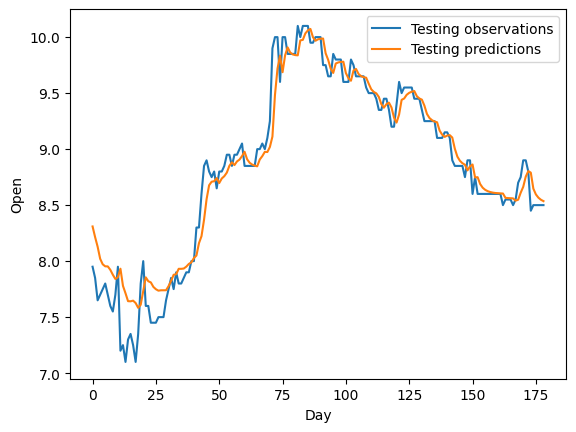

In [122]:
plt.plot(new_y_test, label='Testing observations')
plt.plot(test_predictions, label='Testing predictions')
plt.xlabel('Day')
plt.ylabel('Open')
plt.legend()
plt.show()


In [123]:
import pandas as pd

df = pd.DataFrame({'Actual Open': new_y_test, 'Predicted Open': test_predictions})
print(df)


     Actual Open  Predicted Open
0           7.95        8.309502
1           7.85        8.214257
2           7.65        8.128461
3           7.70        8.020681
4           7.75        7.971792
..           ...             ...
174         8.50        8.647161
175         8.50        8.595629
176         8.50        8.566335
177         8.50        8.547822
178         8.50        8.535642

[179 rows x 2 columns]


## 12. Evaluation du modèle LSTM

In [124]:
import pandas as pd
from sklearn.metrics import mean_squared_error

df = pd.DataFrame({'Actual Open': new_y_test, 'Predicted Open': test_predictions})
mse = mean_squared_error(df['Actual Open'], df['Predicted Open'])
print('Mean Squared Error:', mse)


Mean Squared Error: 0.03756594963776821


In [136]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(df['Actual Open'], df['Predicted Open'])
print('Mean Absolute Error:', mae)


Mean Absolute Error: 0.13393898126799303


In [137]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(df['Actual Open'], df['Predicted Open'], squared=False)
print('Root Mean Squared Error:', rmse)


Root Mean Squared Error: 0.19381937374206998


In [138]:
from sklearn.metrics import r2_score

r2 = r2_score(df['Actual Open'], df['Predicted Open'])
print('R-squared:', r2)


R-squared: 0.9406818975532233


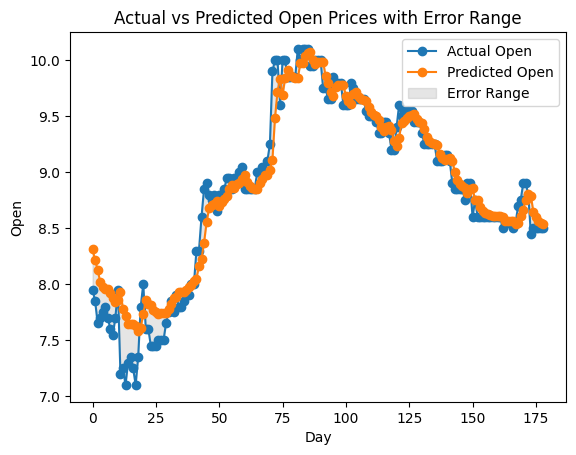

In [143]:
plt.plot(new_y_test, label='Actual Open', marker='o')
plt.plot(test_predictions, label='Predicted Open', marker='o')
plt.fill_between(range(len(new_y_test)), new_y_test, test_predictions, color='gray', alpha=0.2, label='Error Range')
plt.xlabel('Day')
plt.ylabel('Open')
plt.legend()
plt.title('Actual vs Predicted Open Prices with Error Range')
plt.show()


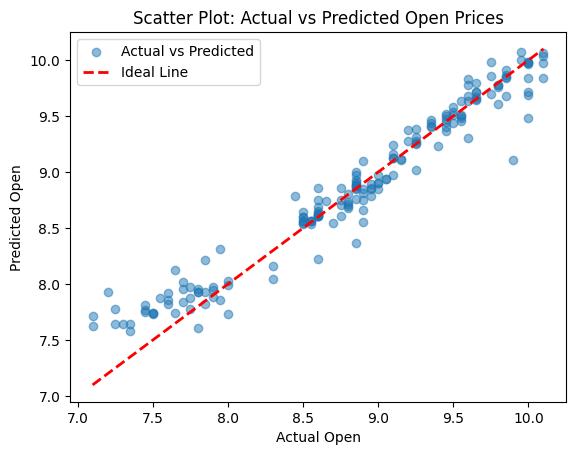

In [145]:
plt.scatter(new_y_test, test_predictions, alpha=0.5, label='Actual vs Predicted')
plt.plot([min(new_y_test), max(new_y_test)], [min(new_y_test), max(new_y_test)], color='red', linestyle='--', linewidth=2, label='Ideal Line')
plt.xlabel('Actual Open')
plt.ylabel('Predicted Open')
plt.title('Scatter Plot: Actual vs Predicted Open Prices')
plt.legend()
plt.show()


les résultats indiquent que le modèle LSTM a des performances solides, avec des erreurs relativement faibles et une capacité à expliquer une grande proportion de la variance dans les données.

In [125]:
import torch.nn as nn

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_stacked_layers):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_stacked_layers = num_stacked_layers

        self.rnn = nn.RNN(input_size, hidden_size, num_stacked_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        batch_size = x.size(0)
        h0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)

        out, _ = self.rnn(x, h0)
        out = self.fc(out[:, -1, :])
        return out


## 13. Modèle RNN

In [147]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from copy import deepcopy as dc


In [148]:
# Fonction pour préparer le DataFrame pour le modèle RNN amélioré
def prepare_dataframe_for_rnn(df, n_steps):
    df = dc(df)

    df.set_index('Date', inplace=True)

    open_columns = []
    for i in range(1, n_steps + 1):
        col_name = f'Open(t-{i})'
        open_columns.append(col_name)
        df[col_name] = df['Open'].shift(i)

    df = df[['Open'] + open_columns].dropna()

    return df

In [150]:
# Paramètres pour la préparation des données
lookback = 20


In [151]:
# Préparation du DataFrame pour le modèle RNN amélioré
shifted_df = prepare_dataframe_for_rnn(data, lookback)

# Conversion en tableau NumPy
shifted_df_as_np = shifted_df.to_numpy()

# Normalisation des données
scaler = MinMaxScaler(feature_range=(-1, 1))
shifted_df_as_np = scaler.fit_transform(shifted_df_as_np)

# Séparation en variables d'entrée (X) et de sortie (y)
X = shifted_df_as_np[:, 1:]
y = shifted_df_as_np[:, 0]

# Renversement des séquences pour un meilleur ajustement du modèle RNN
X = dc(np.flip(X, axis=1))

In [152]:
# Split des données en ensembles d'entraînement et de test
split_index = int(len(X) * 0.95)
X_train = X[:split_index]
X_test = X[split_index:]
y_train = y[:split_index]
y_test = y[split_index:]

# Redimensionnement des données pour être compatibles avec le modèle RNN
X_train = X_train.reshape((-1, lookback, 1))
X_test = X_test.reshape((-1, lookback, 1))
y_train = y_train.reshape((-1, 1))
y_test = y_test.reshape((-1, 1))

# Conversion en tenseurs PyTorch
X_train = torch.tensor(X_train).float()
y_train = torch.tensor(y_train).float()
X_test = torch.tensor(X_test).float()
y_test = torch.tensor(y_test).float()

In [153]:
# Définition du modèle RNN
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_stacked_layers):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_stacked_layers = num_stacked_layers

        self.rnn = nn.RNN(input_size, hidden_size, num_stacked_layers, batch_first=True)
        self.fc1 = nn.Linear(hidden_size, 128)
        self.fc2 = nn.Linear(128, 1)

    def forward(self, x):
        batch_size = x.size(0)
        h0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)

        out, _ = self.rnn(x, h0)
        out = F.relu(self.fc1(out[:, -1, :]))
        out = self.fc2(out)
        return out

# Instanciation du modèle RNN
rnn_model = RNN(1, 4, 1).to(device)

# Fonction de perte
loss_function = nn.MSELoss()

# Optimiseur
optimizer_rnn = torch.optim.Adam(rnn_model.parameters(), lr=0.001)

In [154]:
# Définition de la classe Dataset pour PyTorch
class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, i):
        return self.X[i], self.y[i]

# Création des ensembles de données pour l'entraînement et le test
train_dataset = TimeSeriesDataset(X_train, y_train)
test_dataset = TimeSeriesDataset(X_test, y_test)

# Création des chargeurs de données
batch_size = 16
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


In [155]:
# Fonction d'entraînement pour le modèle RNN
def train_one_epoch_rnn():
    rnn_model.train(True)
    print(f'Epoch: {epoch + 1}')
    running_loss = 0.0
    for batch_index, batch in enumerate(train_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)

        output = rnn_model(x_batch)
        loss = loss_function(output, y_batch)
        running_loss += loss.item()

        optimizer_rnn.zero_grad()
        loss.backward()
        optimizer_rnn.step()

        if batch_index % 100 == 99:
            avg_loss_across_batches = running_loss / 100
            print('Batch {0}, Loss: {1:.3f}'.format(batch_index + 1, avg_loss_across_batches))
            running_loss = 0.0
    print()

In [156]:
# Fonction de validation pour le modèle RNN
def validate_one_epoch_rnn():
    rnn_model.train(False)
    running_loss = 0.0

    for batch_index, batch in enumerate(test_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)

        with torch.no_grad():
            output = rnn_model(x_batch)
            loss = loss_function(output, y_batch)
            running_loss += loss.item()

    avg_loss_across_batches = running_loss / len(test_loader)

    print('Val Loss: {0:.3f}'.format(avg_loss_across_batches))
    print('***************************************************')
    print()

In [157]:
# Hyperparamètres
learning_rate = 0.001
num_epochs = 50

In [158]:
# Boucle d'entraînement
for epoch in range(num_epochs):
    train_one_epoch_rnn()
    validate_one_epoch_rnn()

# Prédictions sur l'ensemble de test avec le modèle RNN
test_predictions_rnn = rnn_model(X_test.to(device)).detach().cpu().numpy().flatten()

# Inverser la normalisation des prédictions avec le modèle RNN
dummies_rnn = np.zeros((X_test.shape[0], lookback + 1))
dummies_rnn[:, 0] = test_predictions_rnn
dummies_rnn = scaler.inverse_transform(dummies_rnn)

test_predictions_rnn = dc(dummies_rnn[:, 0])


Epoch: 1
Batch 100, Loss: 0.074
Batch 200, Loss: 0.003

Val Loss: 0.009
***************************************************

Epoch: 2
Batch 100, Loss: 0.003
Batch 200, Loss: 0.002

Val Loss: 0.006
***************************************************

Epoch: 3
Batch 100, Loss: 0.002
Batch 200, Loss: 0.002

Val Loss: 0.004
***************************************************

Epoch: 4
Batch 100, Loss: 0.002
Batch 200, Loss: 0.002

Val Loss: 0.003
***************************************************

Epoch: 5
Batch 100, Loss: 0.002
Batch 200, Loss: 0.002

Val Loss: 0.003
***************************************************

Epoch: 6
Batch 100, Loss: 0.002
Batch 200, Loss: 0.002

Val Loss: 0.002
***************************************************

Epoch: 7
Batch 100, Loss: 0.002
Batch 200, Loss: 0.002

Val Loss: 0.003
***************************************************

Epoch: 8
Batch 100, Loss: 0.002
Batch 200, Loss: 0.002

Val Loss: 0.002
***************************************************



In [162]:
# Évaluer les performances du modèle RNN
mse_rnn = mean_squared_error(new_y_test, test_predictions_rnn)
print('Mean Squared Error (RNN):', mse_rnn)

mae_rnn = mean_absolute_error(new_y_test, test_predictions_rnn)
print('Mean Absolute Error ( RNN):', mae_rnn)

# Calculer l'erreur quadratique moyenne racine (RMSE) pour le modèle RNN
rmse_rnn = mean_squared_error(new_y_test, test_predictions_rnn, squared=False)
print('Root Mean Squared Error (RNN):', rmse_rnn)

# Calculer le coefficient de détermination (R²) pour le modèle RNN
r2_rnn = r2_score(new_y_test, test_predictions_rnn)
print('R-squared (RNN):', r2_rnn)

Mean Squared Error (RNN): 0.03527385487212572
Mean Absolute Error ( RNN): 0.13299156228007553
Root Mean Squared Error (RNN): 0.18781335115514478
R-squared (RNN): 0.9443012047566117


In [171]:
import pandas as pd

# Création d'un dictionnaire avec les métriques pour les deux modèles
metrics_dict = {
    'Model': ['RNN', 'LSTM'],
    'Mean Squared Error': [mse_rnn, mse],
    'Mean Absolute Error': [mae_rnn, mae],
    'Root Mean Squared Error': [rmse_rnn, rmse],
    'R-squared': [r2_rnn, r2]
}

# Création d'un DataFrame à partir du dictionnaire
metrics_df = pd.DataFrame(metrics_dict)

# Affichage du DataFrame
print(metrics_df)


  Model  Mean Squared Error  Mean Absolute Error  Root Mean Squared Error  \
0   RNN            0.035274             0.132992                 0.187813   
1  LSTM            0.037566             0.133939                 0.193819   

   R-squared  
0   0.944301  
1   0.940682  
